In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 7)

## Process a green screen image, replace the green screen with a background image

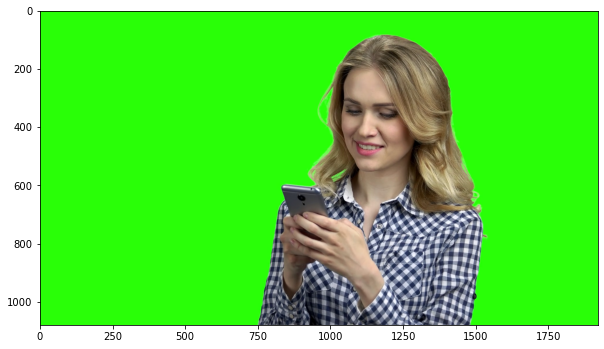

In [2]:
img = cv2.imread("./img/woman_greenscreen.png")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));

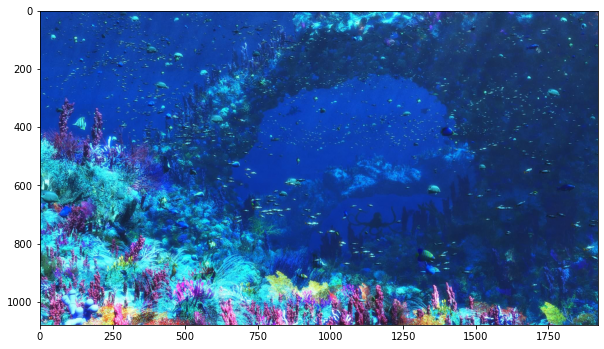

In [3]:
back = cv2.imread("./img/background.jpg")
plt.imshow(cv2.cvtColor(back, cv2.COLOR_BGR2RGB));

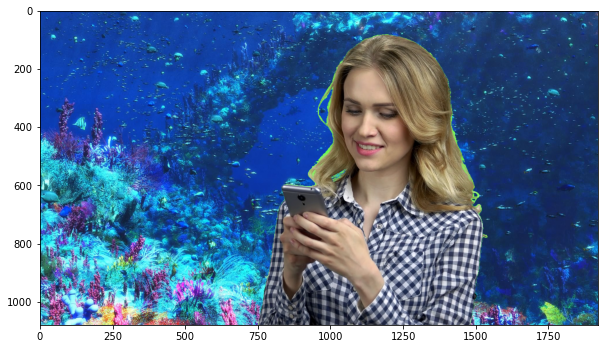

In [4]:
u_green = np.array([100, 255, 100]) 
l_green = np.array([0, 100, 0]) 

mask = cv2.inRange(img, l_green, u_green)

masked_img = img.copy()
masked_back = back.copy()

masked_img[mask != 0] = [0,0,0]
masked_back[mask == 0] = [0,0,0]

final_image = masked_back + masked_img

plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB));

## Adapt this to work with a video file for the background

In [ ]:
back_movie = cv2.VideoCapture("./img/Worm Hole - 6797.mp4")
image = cv2.imread("./img/banana.jpg") 

while(back_movie.isOpened()):
    
    ret, frame = back_movie.read() 
    if frame is not None:
        frame = cv2.resize(frame, (640, 480)) 
        image = cv2.resize(image, (640, 480)) 

        hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

        lower_white = np.array([0,0,0], dtype=np.uint8)
        upper_white = np.array([80,80,255], dtype=np.uint8)

        mask = cv2.inRange(hsv, lower_white, upper_white) 
        
        masked_back = frame.copy()
        masked_img = image.copy()
        
        masked_img[mask != 0] = [0,0,0]
        masked_back[mask == 0] = [0,0,0]

        final_video = masked_back + masked_img
        
        cv2.imshow("video", image) 
        cv2.imshow("masked", final_video)
        cv2.imshow("mask", mask)

        if cv2.waitKey(30) & 0xFF == ord('q'):
                break
    else:
        break


video.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

![space_banana](https://media.giphy.com/media/2eouYPc86iSTj4pfUJ/giphy.gif "space banana")

In [ ]:
## Adapt this to work with a webcam as foreground footage and a video file as background

In [ ]:
back_movie = cv2.VideoCapture("./img/Worm Hole - 6797.mp4")
video = cv2.VideoCapture(0) 

while(video.isOpened()):
    check, image = video.read()
    ret, frame = back_movie.read() 
    if frame is not None:
        frame = cv2.resize(frame, (640, 480)) 
        image = cv2.resize(image, (640, 480)) 
        
        lower_white = (0, 0, 40)
        upper_white = (180, 10, 255)
        
        hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
            
        #lower_white = np.array([0,0,0], dtype=np.uint8)
        #upper_white = np.array([80,80,255], dtype=np.uint8)

        mask = cv2.inRange(hsv, lower_white, upper_white) 
        
        kernel = np.ones((2,2),np.uint8)
        opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
        
        mask_dil = cv2.dilate(opening, None, iterations=5)
        
        masked_img = image.copy()
        masked_back = frame.copy()
        
        masked_back[mask_dil == 0] = [0,0,0]
        masked_img[mask_dil != 0] = [0,0,0]

        final_video = masked_back + masked_img
        
        cv2.imshow("raw", image) 
        cv2.imshow("masked", final_video)
        cv2.imshow("mask", mask)

        if cv2.waitKey(30) & 0xFF == ord('q'):
                break
    else:
        break

back_movie.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

![white_screen](https://media.giphy.com/media/B1YwPIOcDsztiAKzq4/giphy.gif "white screen")